#Agenda
1. Identificar Problema
2. Cargar Datos
3. Clasificar Datos; Diabétes PIMA
4. Uso del modelo para predecir


In [ ]:
import pandas as pd
import kagglehub
import os

# Construct the path to the dataset using the provided format
dataset_path = kagglehub.dataset_download(
    "uciml/pima-indians-diabetes-database"
)
csv_file_path = os.path.join(dataset_path, 'diabetes.csv')

# Load the dataset using the provided format
df = pd.read_csv(csv_file_path)

print(f"Dataset loaded from: {csv_file_path}")

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.
Dataset loaded from: /kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [ ]:
import pandas as pd
import os

# Construct the full path to the CSV file
csv_file_path = os.path.join(dataset_path, 'diabetes.csv')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
display(df.head())

# Display the data types of each column
print("\nData types of each column:")
display(df.info())

# Check for and display the count of missing values for each column
print("\nMissing values per column:")
display(df.isnull().sum())

First 5 rows of the DataFrame:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None


Missing values per column:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (576, 8)
X_test shape: (192, 8)
y_train shape: (576,)
y_test shape: (192,)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model instance
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7292
Precision: 0.6164
Recall: 0.6522
F1-score: 0.6338


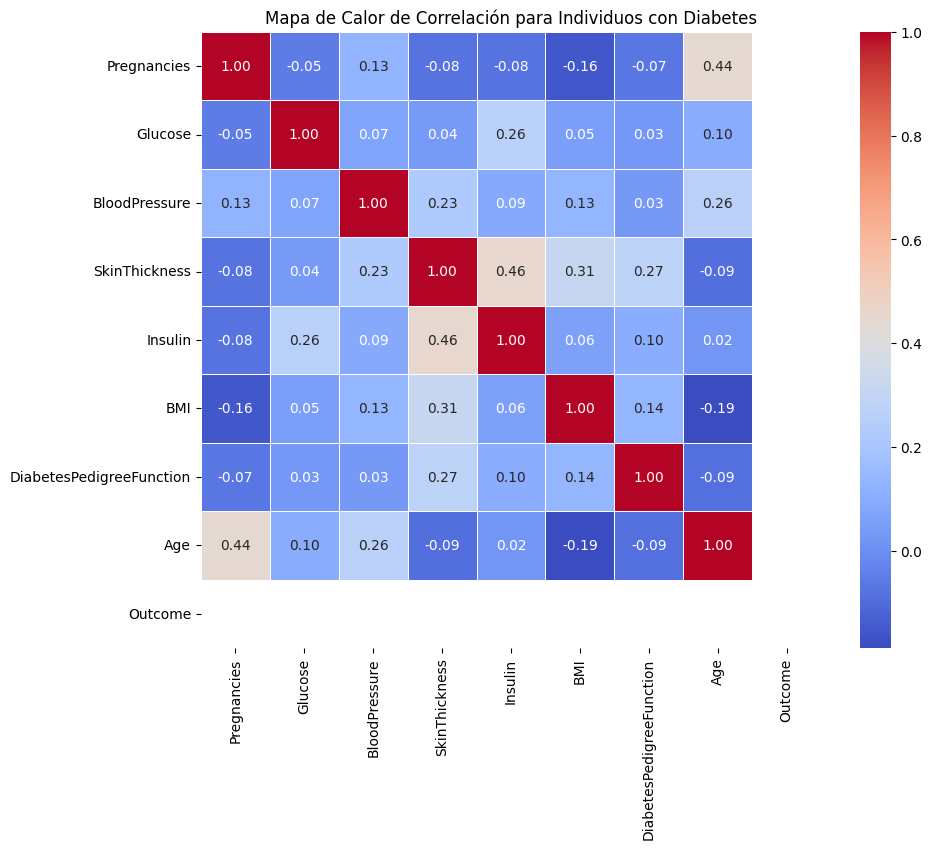

In [ ]:
# Filtrar el DataFrame para incluir solo aquellos con 'Outcome' igual a 1
diabetes_df = df[df['Outcome'] == 1]

# Calcular la matriz de correlación para el subconjunto de personas con diabetes
correlation_matrix_diabetes = diabetes_df.corr()

# Graficar el mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_diabetes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación para Individuos con Diabetes')
plt.show()

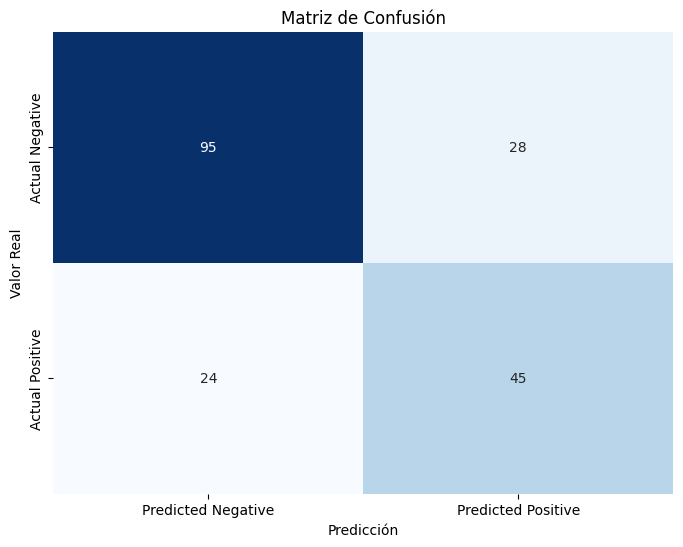

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()